In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
!pip install plotly
import plotly.express as px
warnings.filterwarnings('ignore')
!pip install sidetable
import sidetable as stb

## Exploratory Data Analysis

In [2]:
pd.set_option('display.max_columns', None) #untuk menampilkan semua kolom
pd.set_option('display.max_rows', 100)# untuk menampilkan maksimal 100 kolom

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
df = pd.read_csv('gdrive/My Drive/folder final project/data_for_eda.csv')
# jika tidak ditaruh folder manapun, cukup dengan df = pd.read_csv('gdrive/My Drive/data_for_eda.csv')

In [11]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,1,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn
1,2,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct
2,6,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn
3,17,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn
4,18,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm


In [12]:
df['state'].unique()

array(['mn', 'ct', 'nm', 'tx', 'dc', 'nc', 'ny', 'va', 'wa', 'fl', 'ga',
       'ca', 'de', 'tn', 'wi', 'ar', 'oh', 'ok', 'al', 'ia', 'or', 'nv',
       'mo', 'pa', 'ms', 'ut', 'ky', 'la', 'ks', 'vt', 'ak', 'mt', 'ma',
       'az', 'me', 'nh', 'md', 'ne', 'nd', 'co', 'id', 'wv', 'nj', 'hi',
       'mi', 'ri', 'sc', 'sd', 'wy', 'il', 'in'], dtype=object)

In [13]:
df = df.drop(['Unnamed: 0'],axis=1) # melakukan drop pada kolomn yang tidak terpakai

In [9]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm


In [14]:
print('Total rows:',df.shape[0] )
print('Total kolom: ',df.shape[1])
print('Daftar kolom: ',df.columns)

Total rows: 147129
Total kolom:  15
Daftar kolom:  Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147129 entries, 0 to 147128
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         147129 non-null  int64 
 1   year          147129 non-null  int64 
 2   manufacturer  147129 non-null  object
 3   model         147129 non-null  object
 4   condition     147129 non-null  object
 5   cylinders     147129 non-null  object
 6   fuel          147129 non-null  object
 7   odometer      147129 non-null  int64 
 8   title_status  147129 non-null  object
 9   transmission  147129 non-null  object
 10  drive         147129 non-null  object
 11  size          147129 non-null  object
 12  type          147129 non-null  object
 13  paint_color   147129 non-null  object
 14  state         147129 non-null  object
dtypes: int64(3), object(12)
memory usage: 16.8+ MB


In [16]:
df.describe()

,price,year,odometer
count,147129.000000,147129.000000,147129.000000
mean,19650.135194,2014.991626,61359.974866
std,10635.140046,2.862059,32203.592958
min,2000.000000,2009.000000,0.000000
25%,11590.000000,2013.000000,34047.000000
50%,16995.000000,2015.000000,63172.000000
75%,25988.000000,2017.000000,87371.000000
max,50835.000000,2020.000000,120000.000000


### Feature Engineering

Pada kolom price akan dilakukan feature engineering untuk menambahkan feature/kolom baru 

In [17]:
# Binning the price column

bin_car = [1999, df['price'].mean(),df['price'].max()]
label_car = ['basic car','luxury car']
df['class_car'] = pd.cut(df['price'], bins = bin_car, labels = label_car)

In [18]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,class_car
0,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn,basic car
1,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct,basic car
2,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn,basic car
3,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn,basic car
4,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm,luxury car


In [19]:
df.describe(include='category')

,class_car
count,147129
unique,2
top,basic car
freq,87261


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147129 entries, 0 to 147128
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         147129 non-null  int64   
 1   year          147129 non-null  int64   
 2   manufacturer  147129 non-null  object  
 3   model         147129 non-null  object  
 4   condition     147129 non-null  object  
 5   cylinders     147129 non-null  object  
 6   fuel          147129 non-null  object  
 7   odometer      147129 non-null  int64   
 8   title_status  147129 non-null  object  
 9   transmission  147129 non-null  object  
 10  drive         147129 non-null  object  
 11  size          147129 non-null  object  
 12  type          147129 non-null  object  
 13  paint_color   147129 non-null  object  
 14  state         147129 non-null  object  
 15  class_car     147129 non-null  category
dtypes: category(1), int64(3), object(12)
memory usage: 17.0+ MB


### 3.1 Univariate

#### 3.1.1 Class Car

In [21]:
cc = df.stb.freq(['class_car'], cum_cols =False)
cc

,class_car,count,percent
0,basic car,87261,59.309178
1,luxury car,59868,40.690822


In [22]:
fig = px.pie(data_frame=cc, names='class_car', values='count', title='Class Car')
fig.show()

Class mobil bekas yang paling banyak dijual adalah basic car sebanyak 87.261 /59.3% sedangkan luxury car sebanyak 59.868 / 40,7% 

#### 3.1.2 Price

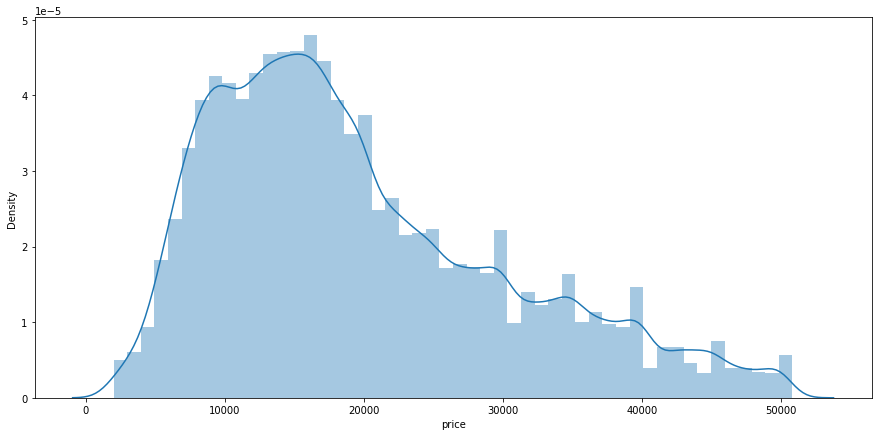

In [23]:
plt.figure(figsize=(15,7))
sns.distplot(df['price'], label='Price');

Berdasarkan plot diatas, distribusi kolom price terlihat menunjukkan Skewness yang bernilai positif dimana ekor distribusi berada di sebelah kanan nilai terbanyak. Berarti, sebagian besar distribusi berada di nilai rendah dan nilai rata-rata nya diatas nilai median. Hal ini juga menunjukkan bahwa kebanyakan dari mobil yang dijual harganya dibawah rata-rata/median dan ada beberapa mobil yang terjual dengan harga yang sangat tinggi jauh melebihi harga pasaran.

#### 3.1.3 Manufacturer

In [24]:
mn = df.stb.freq(['manufacturer'], cum_cols =False)
mn

,manufacturer,count,percent
0,ford,25653,17.435720
1,chevrolet,19682,13.377376
2,toyota,11061,7.517892
3,nissan,9985,6.786561
4,honda,7795,5.298072
5,jeep,7137,4.850845
6,dodge,6101,4.146701
7,hyundai,5285,3.592086
8,ram,5028,3.417409
9,gmc,4983,3.386824


In [25]:
fig = px.bar(mn, x='manufacturer', y='percent', title='Manufacturer of Used Car')
fig.show()

Merk Mobil yang paling banyak dijual di USA adalah Ford sebanyak 25.653 atau persentasenya adalah  17,43%  

#### 3.1.4 Type

In [26]:
ty =df.stb.freq(['type'], cum_cols =False)[1:]
ty

,type,count,percent
1,sedan,33687,22.896234
2,SUV,30524,20.746420
3,pickup,10267,6.978230
4,truck,8901,6.049793
5,hatchback,5560,3.778997
6,coupe,5434,3.693358
7,wagon,4242,2.883184
8,van,3666,2.491691
9,mini-van,1944,1.321289
10,convertible,1328,0.902609


In [27]:
fig = px.bar(ty, x='type', y='percent', title='Type of Used Cars')
fig.show()

Type mobil yang paling banyak dijual adalah sedan sebanyak 33.687 dengan percentase sebanyak 22,89%

#### 3.1.5 Model

In [28]:
model =df.stb.freq(['model'], cum_cols =False).head(10)
model

,model,count,percent
0,f-150,2683,1.823570
1,escape,1896,1.288665
2,silverado 1500,1764,1.198948
3,1500,1393,0.946788
4,altima,1376,0.935234
5,equinox,1359,0.923679
6,fusion,1220,0.829204
7,explorer,1208,0.821048
8,cruze,1126,0.765315
9,grand caravan,1122,0.762596


In [29]:
fig = px.bar(model, x='model', y='percent', title='Model of Used Cars')
fig.show()

Model Mobil yang paling banyak dijual adalah f-150 sebanyak 2683 atau persentasenya adalah 1,82%

#### 3.1.6 Year

In [30]:
year = df.stb.freq(['year'], cum_cols =False)
year

,year,count,percent
0,2017,24250,16.482135
1,2016,16178,10.995793
2,2015,15862,10.781015
3,2014,14839,10.085707
4,2018,13675,9.294565
5,2013,13555,9.213004
6,2019,12751,8.666544
7,2012,11069,7.523330
8,2011,9330,6.341374
9,2010,6710,4.560624


In [31]:
fig = px.bar(year, x='year', y='percent', title='Year of Used Car Release')
fig.show()

Tahun pembuatan mobil paling banyak dijual adalah tahun 2017 sebanyak 24.250 atau 16.48 %

#### 3.1.7 Fuel

In [32]:
fu= df.stb.freq(['fuel'], cum_cols =False)
fu

,fuel,count,percent
0,gas,130784,88.890701
1,other,7102,4.827057
2,diesel,6429,4.369635
3,hybrid,2051,1.394015
4,electric,763,0.518593


In [33]:
# fig = px.bar(fu, x='fuel', y='percent', title='Fuel of Used Cars')
# fig.show()
fig = px.pie(data_frame=fu, names='fuel', values='count', title='Fuel of Used Cars')
fig.show()

Mobil yang memiliki bahan bakar gas adalah yang paling banyak dijual dengan total sebanyak 130784 dengan persentase 88.89%

#### 3.1.8 State

In [35]:
state =df.stb.freq(['state'], cum_cols =False).head(10)
state

,state,count,percent
0,ca,15332,10.420787
1,fl,10342,7.029206
2,tx,8419,5.722189
3,ny,6491,4.411775
4,oh,5777,3.926486
5,mi,5730,3.894542
6,wa,5720,3.887745
7,wi,4807,3.267201
8,nc,4771,3.242733
9,tn,4396,2.987854


In [36]:
fig = px.bar(state, x='state', y='percent', title='State of Used Car')
fig.show()

State/Negara bagian yang paling banyak menjual mobil bekas adalah CA (california) sebanyak 15.332 atau persentasenya sebanyak 10.41%. untuk informasi mengenai code dari setiap state ada di https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971

### 3.2 Multivariate

In [37]:
lux_car = df[df['class_car']=='luxury car']
bas_car = df[df['class_car']=='basic car']


#### 3.2.1 Basic Car

##### 3.2.1.1 Type Used Basic car by Median Price

In [38]:
type_price_bs = pd.crosstab(columns='median price', index=bas_car['type'],values=bas_car['price'], aggfunc='median')
type_price_bs = type_price_bs.sort_values(by=['median price'],ascending=False)
type_price_bs

col_0,median price
type,
pickup,15999.0
offroad,15750.0
truck,15500.0
van,14990.0
SUV,13997.0
coupe,13544.5
convertible,13499.0
wagon,12995.0
mini-van,12422.0


In [39]:
fig = px.bar(type_price_bs, x=type_price_bs.index, y='median price', title='Type Used Basic car by Median Price')
fig.show()

Jenis tipe Used basic car yang memiliki rata-rata paling mahal adalah offroad sedangkan jenis mobil yang memiliki rata-rata paling murah adalah hatch back

##### 3.2.1.2 Manufacturer Used Basic Car By Median Price

In [40]:
merk_price_bc = pd.crosstab(columns='median price', index=bas_car['manufacturer'],values=bas_car['price'], aggfunc='median')
merk_price_bc = merk_price_bc.sort_values(by=['median price'],ascending=False)
merk_price_bc

col_0,median price
manufacturer,
land rover,15995
ram,15495
lexus,14998
infiniti,14500
acura,14500
cadillac,14275
gmc,14150
mercedes-benz,13998
audi,13998


In [41]:
fig = px.bar(merk_price_bc, x=merk_price_bc.index, y='median price', title='Manufacture Used Basic Cars by Median Price')
fig.show()

##### 3.2.1.3 State of Sell Used Basic Car By Median Price

In [42]:
state_price_bs = pd.crosstab(columns='median price', index=bas_car['state'],values=bas_car['price'], aggfunc='median')
state_price_bs = state_price_bs.sort_values(by=['median price'],ascending=False)
state_price_bs

col_0,median price
state,
wa,14500.0
mt,13998.0
ak,13995.0
in,13995.0
ar,13995.0
sd,13995.0
hi,13995.0
nd,13990.0
ne,13800.0


In [44]:
fig = px.bar(state_price_bs, x=state_price_bs.index, y='median price', title='State of Sell Used Basic Car By Median Price')
fig.show()

##### 3.2.1.4 Median Price of Used Basic Car by Year

In [45]:
year_price_bs = pd.crosstab(columns='median price', index=bas_car['year'],values=bas_car['price'], aggfunc='median')
year_price_bs = year_price_bs.sort_values(by=['median price'],ascending=False)
year_price_bs

col_0,median price
year,
2020,16995
2019,16947
2018,15999
2017,15988
2016,13995
2015,12995
2014,12795
2013,11495
2011,9995


In [46]:
fig = px.bar(year_price_bs, x=year_price_bs.index, y='median price', title='Median Price of Used Basic Car by Year')
fig.show()

##### 3.2.1.5 Title Status by Median Price

In [47]:
ts_price_bs = pd.crosstab(columns='median price', index=bas_car['title_status'],values=bas_car['price'], aggfunc='median')
ts_price_bs = ts_price_bs.sort_values(by=['median price'],ascending=False)
ts_price_bs


col_0,median price
title_status,
lien,13000
clean,12950
unknown,12900
rebuilt,9900
salvage,9500


In [48]:
fig = px.bar(ts_price_bs, x=ts_price_bs.index, y='median price', title='Median Price of Used Basic Car by Title Status')
fig.show()

##### 3.2.1.6 Condition Used Basic Car by Median Price

In [49]:
c_price_bs = pd.crosstab(columns='median price', index=bas_car['condition'],values=bas_car['price'], aggfunc='median')
c_price_bs = c_price_bs.sort_values(by=['median price'],ascending=False)
c_price_bs

col_0,median price
condition,
good,13000
unknown,12999
like new,12900
new,12000
excellent,11499
salvage,7000
fair,5000


In [50]:
fig = px.bar(c_price_bs, x=c_price_bs.index, y='median price', title='Median Price of Used Basic Car by Condition')
fig.show()

#### 3.2.2 Luxury Car

##### 3.2.2.1 Type Used Luxury car by Median Price

In [51]:
type_price_lc = pd.crosstab(columns='median price', index=lux_car['type'],values=lux_car['price'], aggfunc='median')
type_price_lc = type_price_lc.sort_values(by=['median price'],ascending=False)
type_price_lc

col_0,median price
type,
truck,34988.0
pickup,33980.0
offroad,32441.0
other,27995.0
coupe,27984.0
convertible,27498.0
SUV,26900.0
van,24985.0
wagon,24500.0


In [52]:
fig = px.bar(type_price_lc, x=type_price_lc.index, y='median price', title='Type Used Luxury car by Median Price')
fig.show()

##### 3.2.2.2 Manufacturer Used Luxury car by Median Price

In [53]:
merk_price_lc = pd.crosstab(columns='median price', index=lux_car['manufacturer'],values=lux_car['price'], aggfunc='median')
merk_price_lc = merk_price_lc.sort_values(by=['median price'],ascending=False)
merk_price_lc

col_0,median price
manufacturer,
tesla,40990.0
aston-martin,39950.0
porche,38229.5
ram,32990.0
other,32900.0
volvo,31910.0
jaguar,31062.5
gmc,30999.5
toyota,30487.0


In [54]:
fig = px.bar(merk_price_lc, x=merk_price_lc.index, y='median price', title='Manufacture Used Basic Cars by Median Price')
fig.show()

##### 3.2.2.3 State of Sell Used Luxury  Car by Median Price

In [55]:
state_price_lc = pd.crosstab(columns='median price', index=lux_car['state'],values=lux_car['price'], aggfunc='median')
state_price_lc = state_price_lc.sort_values(by=['median price'],ascending=False)
state_price_lc

col_0,median price
state,
wa,34999.0
az,33995.0
wy,32974.0
id,31999.0
nm,31997.0
wv,31996.5
ks,29999.5
ar,29999.0
ok,29998.5


In [56]:
fig = px.bar(state_price_lc, x=state_price_lc.index, y='median price', title='State of Sell Used Basic Car By Median Price')
fig.show()

##### 3.2.2.4 Year Release of Used Luxury Car by Median Price

In [57]:
year_price_lc = pd.crosstab(columns='median price', index=lux_car['year'],values=lux_car['price'], aggfunc='median')
year_price_lc = year_price_lc.sort_values(by=['median price'],ascending=False)
year_price_lc

col_0,median price
year,
2020,35318
2018,29999
2019,29900
2009,28999
2017,28985
2015,28807
2016,27995
2014,25990
2011,25900


In [58]:
fig = px.bar(year_price_lc, x=year_price_lc.index, y='median price', title='Median Price of Used Basic Car by Year')
fig.show()

##### 3.2.2.5 Title Status of Used Luxury Car by Median Price

In [59]:
ts_price_lc = pd.crosstab(columns='median price', index=lux_car['title_status'],values=lux_car['price'], aggfunc='median')
ts_price_lc = ts_price_lc.sort_values(by=['median price'],ascending=False)
ts_price_lc


col_0,median price
title_status,
clean,28888
lien,28500
unknown,28450
salvage,25250
rebuilt,24900


In [60]:
fig = px.bar(ts_price_lc, x=ts_price_lc.index, y='median price', title='Median Price of Used Basic Car by Title Status')
fig.show()

##### 3.2.2.6 Condition of Used Luxury Car by Median Price

In [61]:
c_price_lc = pd.crosstab(columns='median price', index=lux_car['condition'],values=lux_car['price'], aggfunc='median')
c_price_lc = c_price_lc.sort_values(by=['median price'],ascending=False)
c_price_lc


col_0,median price
condition,
new,33900
unknown,29493
like new,28995
excellent,27500
good,26990
salvage,26750
fair,25500


In [62]:
fig = px.bar(c_price_lc, x=c_price_lc.index, y='median price', title='Median Price of Used Basic Car by Condition')
fig.show()

In [ ]:
df.to_csv(r'gdrive/My Drive/folder final project/data_for_ml.csv')
